Day 27 lol

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def rungaFourth(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,v0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    vpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, vpoints

In [25]:
def grav(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81
    return np.array([fy, fv], float)

In [37]:
def drag(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81
    return np.array([fy, fv], float)

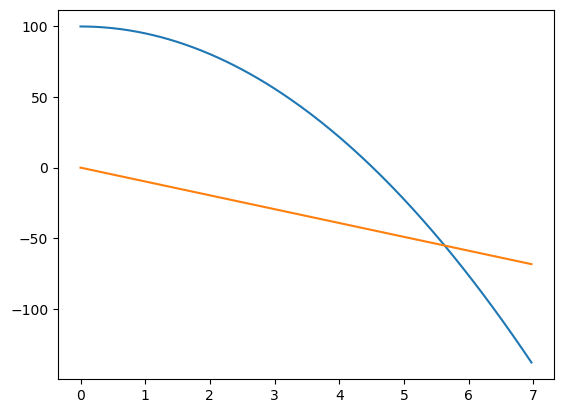

In [39]:
t,y,v = rungaFourth(grav, x0=100, tf=7)
fig0, ax0 = plt.subplots()
ax0.plot(t,y)
ax0.plot(t,v)

y_dot## What we still want to know:
When does y = 0 (find roots)

--------------------------

## linear drag vs quadratic drag

linear: thick substance, slow velocities y_double_dot = -g -c*y_dot

quadratic: thin substance (air) y_double_dot = -g -cy_dot^2

In [28]:
# grav with linear drag
def f_lin(r,t):
    c = 1
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81 -c*v
    return np.array([fy, fv], float)

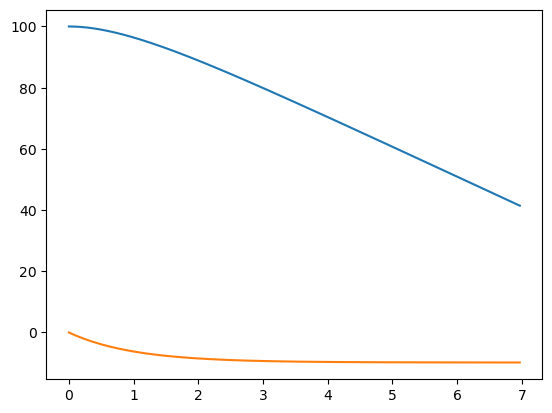

In [29]:
t,y,v = rungaFourth(f_lin, x0=100, tf=7)
fig0, ax0 = plt.subplots()
ax0.plot(t,y)
ax0.plot(t,v)

In [30]:
# grav with quadratic drag
def f_quad(r,t):
    c = .001
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81 -c*v**2
    return np.array([fy, fv], float)

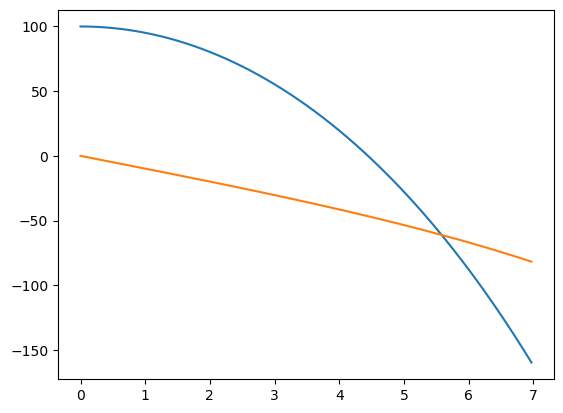

In [31]:
tq,yq,vq = rungaFourth(f_quad, x0=100, tf=7)
fig0, ax0 = plt.subplots()
ax0.plot(tq,yq)
ax0.plot(tq,vq)

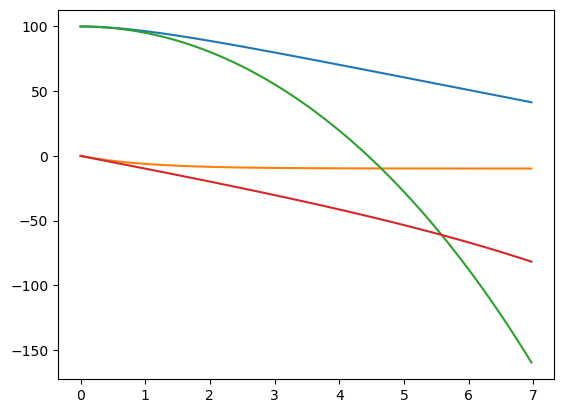

In [32]:
fig0, ax0 = plt.subplots()
ax0.plot(t,y)
ax0.plot(t,v)
ax0.plot(t,yq)
ax0.plot(t,vq)

## Homework: how could we get boyancy as well?
y_dot_dot = -g + c1 - c2 * y_dot

### Init. conditions
y(0) = -1m

y_dot(0) = 0m/s

In [2]:
def f_boy(r,t):
    c1 = 10
    c2 = 1
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81 + c1 - c2 * v
    return np.array([fy, fv], float)
# in order for object to float, force of boyancy (c1) > grav + c2

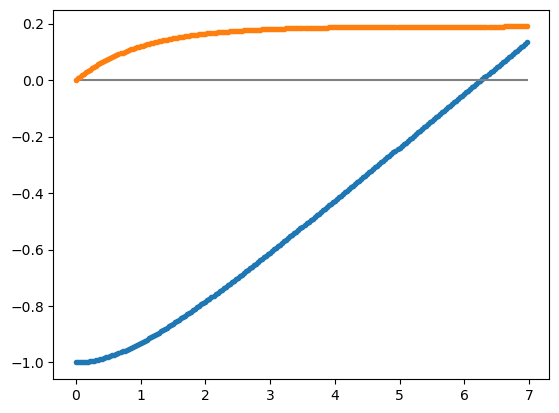

In [83]:
tb,yb,vb = rungaFourth(f_boy, x0=-1, tf=7)
figb, axb = plt.subplots()
axb.plot(tb,yb, ".")
axb.plot(tb,tb*0, "gray")
axb.plot(tb,vb, ".")

In [3]:
tb,yb,vb = cRK4(f_boy, x0=-1, tf=7)
figb, axb = plt.subplots()
axb.plot(tb,yb, ".")
axb.plot(tb,tb*0, "gray")
axb.plot(tb,vb, ".")

NameError: name 'cRK4' is not defined